<a href="https://colab.research.google.com/github/marisol6/Analytics/blob/main/Python/Unit4_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

## EDA

In [ ]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

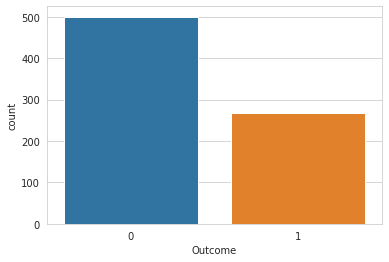

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Outcome', data = diabetes)


In [ ]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


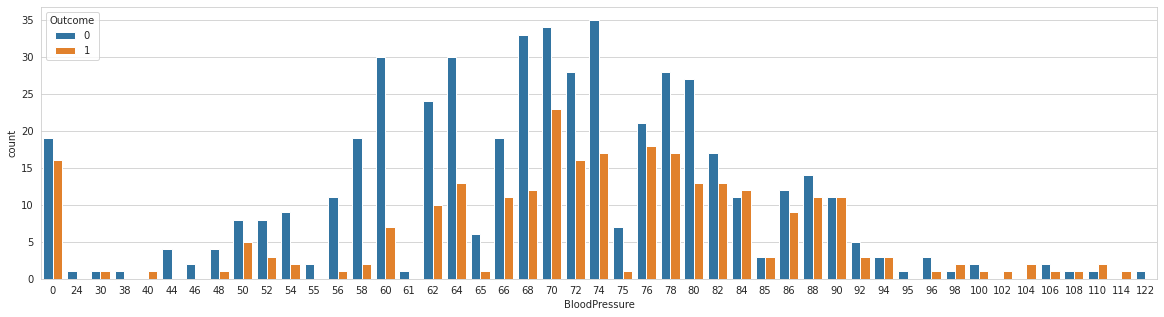

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'BloodPressure', hue = 'Outcome', data = diabetes)

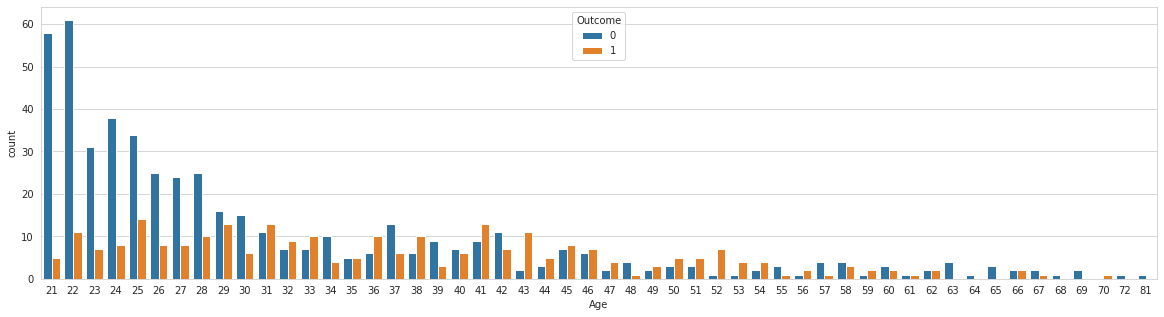

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'Age', hue = 'Outcome', data = diabetes)

In [ ]:
positive_bmi = diabetes.loc[diabetes['Outcome'] == 1, 'BMI'].to_frame()
negative_bmi = diabetes.loc[diabetes['Outcome'] == 0, 'BMI'].to_frame()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


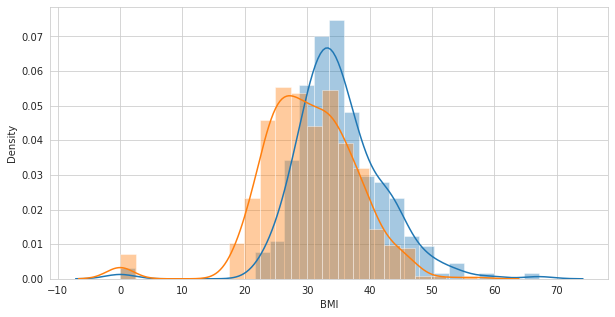

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(positive_bmi['BMI'])
sns.distplot(negative_bmi['BMI'])
plt.show()

## Build Models

In [ ]:
x = diabetes.drop(columns = 'Outcome', axis = 1)
y = diabetes['Outcome']

In [ ]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(x)

In [ ]:
x = standardized_data
y = diabetes['Outcome']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 101)

In [ ]:
clf = svm.SVC(kernel = 'linear')

In [ ]:
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
training_predict = clf.predict(x_train)
training_accuracy = accuracy_score(training_predict, y_train)
training_accuracy

0.7783985102420856

## Evaluating Model

In [ ]:
test_predict = clf.predict(x_test)
test_accuracy = accuracy_score(test_predict, y_test)
test_accuracy

0.7619047619047619

In [ ]:
print(classification_report(test_predict, y_test))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       173
           1       0.52      0.72      0.60        58

    accuracy                           0.76       231
   macro avg       0.71      0.75      0.72       231
weighted avg       0.80      0.76      0.77       231



## Predictive System

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = clf.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
